In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
# Read in the Mental Health data
mental_health_df = pd.read_csv('../survey.csv')
mental_health_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
mental_health_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [4]:
# Create a dataframe with just the United States
mhUS_df = mental_health_df[mental_health_df['Country'] == "United States"]
mhUS_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Counts for benefits
benefits = mhUS_df['benefits'].value_counts()
benefits_df = pd.DataFrame(benefits)
benefits_df

,count
benefits,
Yes,398
Don't know,236
No,117


In [6]:
# Create an expected benefits (all equally expected) for the chi-squared test
benefits_equal_df = benefits_df.copy()
benefits_equal_df['expected'] = benefits_equal_df['count'].sum()/len(benefits_equal_df)
benefits_equal_df

,count,expected
benefits,,
Yes,398,250.333333
Don't know,236,250.333333
No,117,250.333333


In [7]:
# Calculate critical value for benefits with a confidence level of 0.95
ben_crit_val = stats.chi2.ppf(q = 0.95, df = (len(benefits_df)-1))
ben_crit_val

5.991464547107979

In [8]:
# Run the chi square test with benefits and equal expected values
ben_equal_statistic, p_value = stats.chisquare(benefits_equal_df['count'], benefits_equal_df['expected'])
if ben_equal_statistic > ben_crit_val:
    print(f"Since the chi square value of {round(ben_equal_statistic,2)} exceeds the critical value of {round(ben_crit_val,2)}, we conclude that the results are statistically significant.")
else:
    print(f"Since the chi square value of {round(ben_equal_statistic,2)} does not exceed the critical value of {round(ben_crit_val,2)}, we conclude that the results are NOT statistically significant.")

Since the chi square value of 158.94 exceeds the critical value of 5.99, we conclude that the results are statistically significant.


In [9]:
# Create an expected benefits (60% yes, 20% Don't know, 20% No) for the chi-squared test
yes = 0.6
dont_know = 0.2
no = 0.2
total_ben_count = benefits_df['count'].sum()
benefits_unequal_df = benefits_df.copy()
benefits_unequal_exp = [total_ben_count*yes, total_ben_count*dont_know, total_ben_count*no] 
benefits_unequal_df['expected'] = benefits_unequal_exp
benefits_unequal_df

,count,expected
benefits,,
Yes,398,450.6
Don't know,236,150.2
No,117,150.2


In [10]:
# Run the chi square test with benefits and unequal expected values
ben_unequal_statistic, p_value = stats.chisquare(benefits_unequal_df['count'], benefits_unequal_df['expected'])
if ben_unequal_statistic > ben_crit_val:
    print(f"Since the chi square value of {round(ben_unequal_statistic,2)} exceeds the critical value of {round(ben_crit_val,2)}, we conclude that the results are statistically significant.")
else:
    print(f"Since the chi square value of {round(ben_unequal_statistic,2)} does not exceed the critical value of {round(ben_crit_val,2)}, we conclude that the results are NOT statistically significant.")

Since the chi square value of 62.49 exceeds the critical value of 5.99, we conclude that the results are statistically significant.


In [11]:
# Counts for treatments
treatments = mhUS_df['treatment'].value_counts()
treatments_df = pd.DataFrame(treatments)
treatments_df

,count
treatment,
Yes,410
No,341


In [12]:
# Create an expected treatments (all equally expected) for the chi-squared test
treatments_equal_df = treatments_df.copy()
treatments_equal_df['expected'] = treatments_equal_df['count'].sum()/len(treatments_equal_df)
treatments_equal_df

,count,expected
treatment,,
Yes,410,375.5
No,341,375.5


In [13]:
# Calculate critical value for treatments with a confidence level of 0.95
treatments_crit_val = stats.chi2.ppf(q = 0.95, df = (len(treatments_df)-1))
treatments_crit_val

3.841458820694124

In [14]:
# Run the chi square test with treatments and equal expected values
treat_equal_statistic, p_value = stats.chisquare(treatments_equal_df['count'], treatments_equal_df['expected'])
if treat_equal_statistic > treatments_crit_val:
    print(f"Since the chi square value of {round(treat_equal_statistic,2)} exceeds the critical value of {round(treatments_crit_val,2)}, we conclude that the results are statistically significant.")
else:
    print(f"Since the chi square value of {round(treat_equal_statistic,2)} does not exceed the critical value of {round(treatments_crit_val,2)}, we conclude that the results are NOT statistically significant.")

Since the chi square value of 6.34 exceeds the critical value of 3.84, we conclude that the results are statistically significant.


In [31]:
# Create table of data used
treatment_present_values = {"Degrees of Freedom":(len(treatments_df)-1), "Confidence Level":"95%", "Critical Value":(treatments_crit_val), "Chi Square Value":(treat_equal_statistic)}
treatment_present_values_df = pd.DataFrame(treatment_present_values, index=[0])
def center_align(data):
    return 'text-align: center'
treatment_present_values_df = treatment_present_values_df.style.map(center_align)
treatment_present_values_df

,Degrees of Freedom,Confidence Level,Critical Value,Chi Square Value
0,1,95%,3.841459,6.339547


In [32]:
# Create an expected treatments (60% yes, 40% No) for the chi-squared test
yes = 0.6
no = 0.4
total_treat_count = treatments_df['count'].sum()
treatments_unequal_df = treatments_df.copy()
treatments_unequal_exp = [total_treat_count*yes, total_treat_count*no] 
treatments_unequal_df['expected'] = treatments_unequal_exp
treatments_unequal_df

,count,expected
treatment,,
Yes,410,450.6
No,341,300.4


In [33]:
# Run the chi square test with treatments and unequal expected values
treat_unequal_statistic, p_value = stats.chisquare(treatments_unequal_df['count'], treatments_unequal_df['expected'])
if treat_unequal_statistic > treatments_crit_val:
    print(f"Since the chi square value of {round(treat_unequal_statistic,2)} exceeds the critical value of {round(treatments_crit_val,2)}, we conclude that the results are statistically significant.")
else:
    print(f"Since the chi square value of {round(treat_unequal_statistic,2)} does not exceed the critical value of {round(treatments_crit_val,2)}, we conclude that the results are NOT statistically significant.")

Since the chi square value of 9.15 exceeds the critical value of 3.84, we conclude that the results are statistically significant.


In [34]:
# Create a dataframe for the relationship between treatment and benefits in order to create a bar chart to show the relationship
benefits_treatments = mhUS_df.groupby(['benefits', 'treatment']).size().unstack()
benefits_treatments

treatment,No,Yes
benefits,,
Don't know,151,85
No,48,69
Yes,142,256


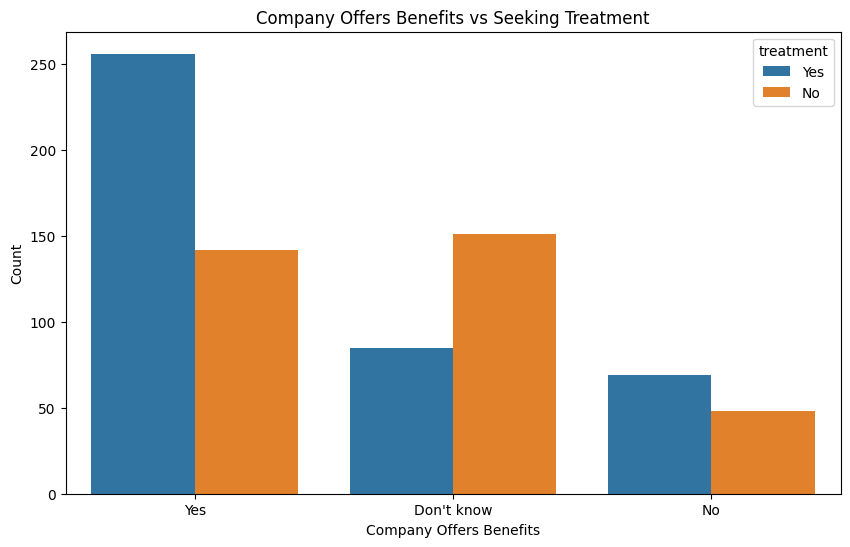

In [35]:
# Bar Chart: Company Offers Benefits vs Seeking Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=mhUS_df, x='benefits', hue='treatment')
plt.title('Company Offers Benefits vs Seeking Treatment')
plt.xlabel('Company Offers Benefits')
plt.ylabel('Count')
plt.savefig('Images/benefits_treatment.png')
plt.show()

In [36]:
# Create a column which indicates a 1 if seeking Treatment
mhUS_df = mhUS_df.copy()
mhUS_df.loc[:, 'Age_Treatment'] = np.where(mhUS_df['treatment'] == 'Yes', 1, 0)
mhUS_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_Treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,0
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,1
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,1
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,0


In [37]:
# Remove ages which are less than 20 and make them 20 and older than 70 make them 70
mhUS_df.loc[:, 'Age'] = np.where(mhUS_df['Age'] < 20, 20, mhUS_df['Age'])
mhUS_df.loc[:, 'Age'] = np.where(mhUS_df['Age'] > 70, 70, mhUS_df['Age'])
mhUS_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_Treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,0
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,1
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,1
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,0


In [38]:
# Create a df with only those seeking treatment
treatment_only_df = mhUS_df[mhUS_df['Age_Treatment'] == 1]
treatment_only_df = treatment_only_df[['Timestamp','Age','Age_Treatment']]
treatment_only_df

,Timestamp,Age,Age_Treatment
0,2014-08-27 11:29:31,37,1
6,2014-08-27 11:31:50,35,1
8,2014-08-27 11:32:39,42,1
10,2014-08-27 11:32:44,31,1
12,2014-08-27 11:33:23,42,1
...,...,...,...
1250,2015-07-27 23:25:34,30,1
1252,2015-08-20 16:52:09,29,1
1255,2015-09-26 01:07:35,32,1
1256,2015-11-07 12:36:58,34,1


In [39]:
# Establish the bins.
age_bins = [20, 30, 40, 50, 60, 70]
labels = ["Under 30", "30 to 39", "40 to 49", "50 to 59", "60 and older"]

# Categorize each person receiving treatment by age group
treatment_only_df = treatment_only_df.copy()
treatment_only_df["Age Group"] = pd.cut(treatment_only_df["Age"], bins=age_bins, labels=labels, include_lowest=True)
treatment_only_df


,Timestamp,Age,Age_Treatment,Age Group
0,2014-08-27 11:29:31,37,1,30 to 39
6,2014-08-27 11:31:50,35,1,30 to 39
8,2014-08-27 11:32:39,42,1,40 to 49
10,2014-08-27 11:32:44,31,1,30 to 39
12,2014-08-27 11:33:23,42,1,40 to 49
...,...,...,...,...
1250,2015-07-27 23:25:34,30,1,Under 30
1252,2015-08-20 16:52:09,29,1,Under 30
1255,2015-09-26 01:07:35,32,1,30 to 39
1256,2015-11-07 12:36:58,34,1,30 to 39


In [40]:
# Create Dataframe with Age Group Counts for those receiving Treatment
treat_age_groups = treatment_only_df['Age Group'].value_counts()
treat_age_groups
age_groups_df = pd.DataFrame(treat_age_groups)
age_groups_df = age_groups_df.rename(columns={'count': 'Receiving Treatment'})
age_groups_df

,Receiving Treatment
Age Group,
30 to 39,177
Under 30,165
40 to 49,55
50 to 59,11
60 and older,2


In [41]:
# Categorize each person by age group
age_only_df = mhUS_df.copy()
age_only_df = age_only_df[['Timestamp','Age','Age_Treatment']]
age_only_df["Age Group"] = pd.cut(age_only_df["Age"], bins=age_bins, labels=labels, include_lowest=True)
age_only_df


,Timestamp,Age,Age_Treatment,Age Group
0,2014-08-27 11:29:31,37,1,30 to 39
1,2014-08-27 11:29:37,44,0,40 to 49
4,2014-08-27 11:30:22,31,0,30 to 39
5,2014-08-27 11:31:22,33,0,30 to 39
6,2014-08-27 11:31:50,35,1,30 to 39
...,...,...,...,...
1253,2015-08-25 19:59:38,36,0,30 to 39
1255,2015-09-26 01:07:35,32,1,30 to 39
1256,2015-11-07 12:36:58,34,1,30 to 39
1257,2015-11-30 21:25:06,46,0,40 to 49


In [42]:
# Add Age Group Counts for all participants in age group DF
age_groups = age_only_df['Age Group'].value_counts()
age_groups
age_groups_df['All Participants'] = age_groups
age_groups_df

,Receiving Treatment,All Participants
Age Group,,
30 to 39,177,326
Under 30,165,309
40 to 49,55,95
50 to 59,11,17
60 and older,2,4


In [55]:
# Calculate Percent in each age group receiving treatment and add to df
age_groups_df['Expected Receiving Treatment'] = round(treatments_df.iloc[0,0]*age_groups_df['All Participants']/total_treat_count,0).astype(int)
age_groups_df

,Receiving Treatment,All Participants,Expected Receiving Treatment
Age Group,,,
30 to 39,177,326,178
Under 30,165,309,169
40 to 49,55,95,52
50 to 59,11,17,9
60 and older,2,4,2


In [56]:
# Calculate critical value for age groups with a confidence level of 0.95
age_groups_crit_val = stats.chi2.ppf(q = 0.95, df = (len(age_groups_df)-1))
age_groups_crit_val

9.487729036781154

In [57]:
# Run the chi square test with treatments and equal expected values
age_equal_statistic, p_value = stats.chisquare(age_groups_df['Receiving Treatment'], age_groups_df['Expected Receiving Treatment'])
if age_equal_statistic > age_groups_crit_val:
    print(f"Since the chi square value of {round(age_equal_statistic,2)} exceeds the critical value of {round(age_groups_crit_val,2)}, we conclude that the results are statistically significant.")
else:
    print(f"Since the chi square value of {round(age_equal_statistic,2)} does not exceed the critical value of {round(age_groups_crit_val,2)}, we conclude that the results are NOT statistically significant.")

Since the chi square value of 0.72 does not exceed the critical value of 9.49, we conclude that the results are NOT statistically significant.


In [58]:
# Create table of data used
age_group_values = {"Degrees of Freedom":(len(age_groups_df)-1), "Confidence Level":"95%", "Critical Value":(age_groups_crit_val), 
                    "Chi Square Value":(age_equal_statistic)}
age_group_values_df = pd.DataFrame(age_group_values, index=[0])
def center_align(data):
    return 'text-align: center'
age_group_values_df = age_group_values_df.style.map(center_align)
age_group_values_df

,Degrees of Freedom,Confidence Level,Critical Value,Chi Square Value
0,4,95%,9.487729,0.717814
